In [1]:
import numpy as np

In [2]:
def G(xi,yi,xj,yj):
    r = np.array([[xi-xj, yi-yj]])
    rr = np.sqrt(r.dot(r.T))
    out = (np.eye(2)*np.log(1/np.abs(rr))+np.outer(r,r)/rr**2)
    return out

In [12]:
N = 16
theta = np.linspace(0,2*np.pi,N)
x = np.cos(theta)
y = np.sin(theta)

In [13]:
# build solution matrix

m = np.zeros((2*N,2*N))
for i in range(N):
    for j in range(N):
        if j != i:
            m[2*i:2*(i+1), 2*j:2*(j+1)] = G(x[i],y[i],x[j],y[j])

In [14]:
# solve example flow field
v = np.zeros(2*N)
v[::2] = y*np.cos(theta)
v[1::2] = -x*np.cos(theta)

In [15]:
from numpy.linalg import solve
f = solve(m, v)

In [16]:
def get_v(xx, yy):
    v = np.zeros(2)
    for i in range(N):
        v += G(xx,yy,x[i],y[i]).dot(f[2*i:2*(i+1)])
    return v

In [17]:
Np=16
_x, _y = np.meshgrid(np.linspace(-1.1,1.1,Np), np.linspace(-1.1,1.1,Np))

In [18]:
import matplotlib.pyplot as plt

In [19]:
vx = np.zeros_like(_x)
vy = np.zeros_like(_x)


for i in range(Np):
    for j in range(Np):
        vv = get_v(_x[i,j],_y[i,j])
        vx[i,j] = vv[0]
        vy[i,j] = vv[1]

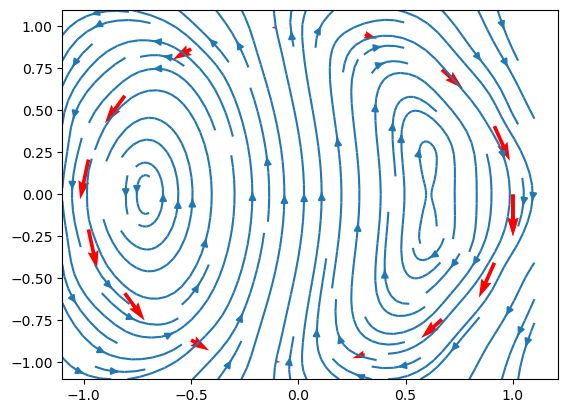

In [20]:
plt.quiver(x,y,v[::2],v[1::2],color='red')
plt.streamplot(_x, _y, vx, vy)

ValueError: 'x' can have at maximum 2 dimensions

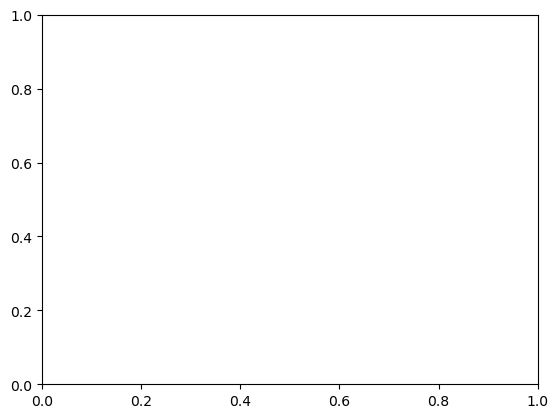

In [26]:
fig =plt.figure()
plt.streamplot(_x, _y, vx, vy)
plt.plot(x,y,'-o')
plt.axis('equal')
plt.tight_layout()
#fig.se


In [ ]:
plt.plot(v[1::2])

ValueError: too many values to unpack (expected 2)

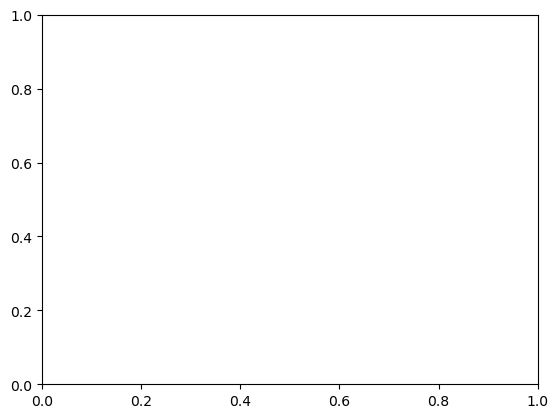

In [12]:
fig =plt.figure()
plt.quiver(vx, vy)
plt.plot(x,y,'-')
plt.axis('equal')
plt.tight_layout()
#fig.se

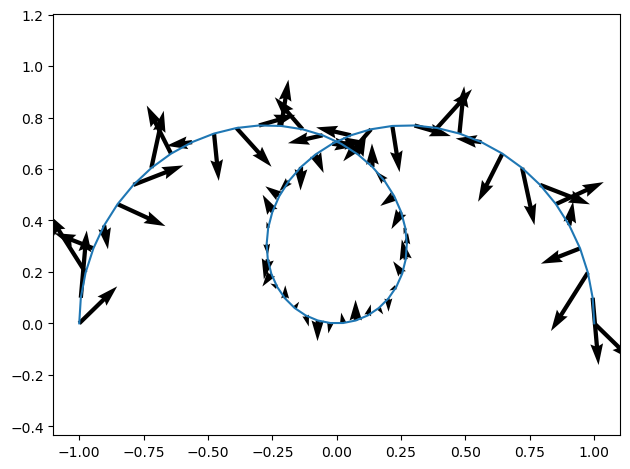

In [13]:
fig =plt.figure()
plt.quiver(x, y, f[::3], f[1::3])
plt.plot(x,y,'-')
plt.axis('equal')
plt.tight_layout()
#fig.se

In [ ]:
fig =plt.figure()
plt.quiver(x, y, v[::2], v[1::2])
plt.plot(x,y,'-')
plt.axis('equal')
plt.tight_layout()
#fig.se

In [ ]:
_x

In [ ]:
vx